# Generalized {n,3}-gram approximate logarithmic spirals

## Set up plotting, math, and polar-to-cartesian utility functions

In [1]:
% matplotlib notebook
import matplotlib
% config InlineBackend.figure_format = 'svg'
% matplotlib inline
# matplotlib.use('SVG')
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [2]:
vcos = np.vectorize(cos)
vsin = np.vectorize(sin)

In [3]:
def xyfromr(theta,r):
    return vcos(theta) * r, vsin(theta) * r

In [4]:
def thrfromxy(x, y):
    """x = array of x coordinates, y = array of y coordinates)
returns theta, r arrays"""
    r = np.array([sqrt(xx * xx + yy * yy) for xx, yy in zip(x, y)])
    th = np.array([atan2(yy, xx) for xx, yy in zip(x, y)])
    return th, r

In [5]:
@np.vectorize
def rfunc(rbase, theta_denom, angle):
    return rbase ** (min(abs(angle), twopi - angle) / theta_denom)

In [6]:
def rotate(x, y, c, s):
    return x * c - y * s, y * c + x * s

In [7]:
# Rotate theta, r coordinates by angle rot around (r,theta) point p,
# then scale the new radius
def mytwist(theta, r, rot, scale, p):
    x, y = xyfromr(theta,r)
    px, py = xyfromr(*p)
    xx, yy = rotate(x-px,y-py,cos(rot),sin(rot))
    xx += px
    yy += py
    th, rr = thrfromxy(xx,yy)
    rr *= scale
    return (th, rr)

In [8]:
def xydist(xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    return sqrt((x1-x2)**2 + (y1-y2)**2)

In [9]:
def rdist(r1, th1, r2, th2):
    return xydist(xyfromr(r1,th1), xyfromr(r2,th2))

In [10]:
def stretch(theta,r,alpha):
    xx, yy = xyfromr(theta,r)
    return(thrfromxy(xx,yy*alpha))

In [11]:
def singleset(nn, kk, mm, theta, r, rscale, alpha, polyangle, jfactor1, jfactor2, fclr, fw):

    for j in range(nn):

        tt, rr = mytwist(theta,r,polyangle,1,(theta[0],r[0]))
        
        jangle = 2*polyangle*j
        jangle += (polyangle*jfactor1) if nn%2 == 0 else (polyangle*jfactor2)

        tt += jangle

        rscalesqrt = sqrt(rscale)
        ffw = fw
        for i in range(nn):
            tte, rre = stretch(tt,rr,alpha)
            if (i < (nn-kk) ):
                plt.plot(tte[:mm],rre[:mm],color=fclr,linewidth=ffw)
                plt.plot(tte[mm:],rre[mm:],color=fclr,linewidth=ffw/rscalesqrt)
            elif ( i == (nn-kk)):
                plt.plot(tte[:mm],rre[:mm],color=fclr,linewidth=ffw)
                if (j == 0 and jfactor2 == 0):
                    print("radius = {}".format(rr[mm-1]))
                
            if (i < (nn-1)):
                tt += polyangle
                rr /= rscale
                ffw /= rscale
        
        tt = -tt

        for i in reversed(range(nn)):
            tte, rre = stretch(tt,rr,alpha)
            if (i < (nn-kk) ):
                plt.plot(tte[:mm],rre[:mm],color=fclr,linewidth=ffw)
                plt.plot(tte[mm:],rre[mm:],color=fclr,linewidth=ffw/rscalesqrt)
                # plt.plot(tte,rre,color=fclr,linewidth=ffw)
            elif ( i == (nn-kk)):
                plt.plot(tte[:mm],rre[:mm],color=fclr,linewidth=ffw)
            tt += polyangle
            rr *= rscale
            ffw *= rscale
    

In [12]:
def doubleturk(n=12, kk=2, m=2, fclr='navy',bclr='navy',fw=2,bw=0.5):
    # n = number of sides in polygon
    plt.ion()

    nn = n // 2
    polyangle = 2 * pi / n
    halfangle = pi / n
    degangle = 360 // n
    polyside = 2 * sin( halfangle )
    anglerange = int(2*degangle + 1)

    # radius to vertex of polygon enclosed in {n/3}
    rscaleinv = 1 - polyside**2
    rscale = 1 / rscaleinv
    twopi = 2. * pi

    theta = np.array([pi * a / 360. for a in range(anglerange)])
    r     = np.array([1.0 for th in theta])

    plt.clf()

    # Polar plot:
    sp = plt.subplot(1, 1, 1, projection='polar')

    # Turn labels off:
    sp.grid(False)
    sp.set_xticklabels([])
    sp.set_yticklabels([])
    
    # Turn border off:
    sp.set_frame_on(False)

    tc = np.array([pi * a / 180. for a in range(361)])
    rc = np.array([1.0 for t in tc])
    
    alpha = 1 # 1.3
    
    te, re = stretch(tc,rc,alpha)

    plt.plot(te,re,color=bclr,linewidth=bw)
    
    tex, rex = stretch(tc,rc*1.01,alpha)
    plt.plot(tex,rex,color=bclr,linewidth=bw)
    
    mm = len(theta) // 2 + m

    singleset(nn, kk, mm, theta, r, rscale, alpha, polyangle, 1/2, 0, fclr, fw)

    singleset(nn, kk, mm, theta, r, rscale, alpha, polyangle, -1/2, -1, fclr, fw)   
   
    rpow = (nn-kk) + 0.5
    
    inner_radius = rscaleinv**rpow
    
    ttt = np.array([a*halfangle for a in range(2*n+1)])
    rrr = np.array([1 if a%2 == 0 else inner_radius for a in range(2*n+1)])
    rrr *= inner_radius
    
    ttt += halfangle * (nn%2)
    
    ttte, rrre = stretch(ttt,rrr,alpha)
    
    plt.plot(ttte,rrre,color=bclr,linewidth=bw)
    
    re *= inner_radius
    # plt.plot(te,re,color=bclr,linewidth=bw)

    re *= inner_radius
    plt.plot(te,re,color=bclr,linewidth=bw)

    # Adjust boundaries on figure
    plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)
    # plt.savefig("n{}gramlotus.pdf".format(n), format="pdf")
    # plt.savefig("n{}gramdtlotus.svg".format(n), format="svg")

radius = 0.29481494037062195


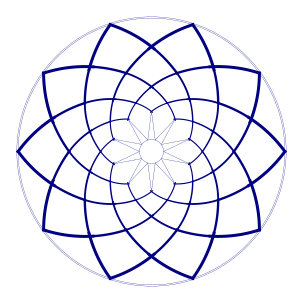

In [14]:
doubleturk(n=10,kk=3,m=8,fw=3,bw=0.25)